# データをざっくりと可視化し、分析の足がかりを得る。

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib # matplotlibに日本語を表示するためのライブラリ
import seaborn as sns

In [4]:
# 自作のプロット用モジュールを読み込む
import sys
sys.path.append("../input/EDA_functions")
import plot_functions as my_plot

## データフレームの構造確認

In [5]:
# データを読み込む
train_df = pd.read_csv("../input/tdse-inclass-competition-0/train.csv")
test_df = pd.read_csv("../input/tdse-inclass-competition-0/test.csv")

In [6]:
# 読み込んだデータの確認。必要ならば型を変換する
print(train_df.dtypes)
train_df.head()

id                   int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object


,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [7]:
# Ageのunique valueを確認
train_df['Age'].unique()

array([33.  , 40.  , 34.  , 36.  , 30.  , 37.  , 43.  , 27.  , 71.  ,
       47.  , 25.  , 55.  , 61.  , 35.  , 41.  , 44.  , 26.  , 39.  ,
       31.  , 58.  , 49.  , 32.  , 50.  , 28.  , 45.  , 52.  , 29.  ,
       38.  , 54.  , 56.  , 46.  , 42.  , 64.  , 20.  , 21.  , 23.  ,
       48.  , 59.  , 51.  , 24.  , 53.  , 62.  , 57.  , 22.  , 66.  ,
       67.  , 19.  , 73.  , 60.  , 63.  , 65.  , 75.  , 68.  , 69.  ,
       76.  , 18.  , 70.  , 81.  , 74.  , 72.  , 77.  , 82.  , 79.  ,
       92.  , 80.  , 78.  , 83.  , 36.44, 85.  , 32.34, 84.  ])

In [8]:
# 型を変換するための辞書を作成
type_dict = {
    "id": int,
    "CustomerId": int,
    "Surname": str,
    "CreditScore": int,
    "Geography": str,
    "Gender": str,
    "Age": float, # intに変換しようとするとエラーが発生したため中身を確認したところ、float型になっていることがわかった
    "Tenure": int,
    "Balance": float,
    "NumOfProducts": int,
    "HasCrCard": int,
    "IsActiveMember": int,
    "EstimatedSalary": float,
    "Exited": int
}

In [9]:
# 型を設定してデータを読み込む
train_df = pd.read_csv(
    "../input/tdse-inclass-competition-0/train.csv",
    dtype=type_dict,
)
test_df = pd.read_csv(
    "../input/tdse-inclass-competition-0/test.csv",
    dtype=type_dict,
    )

## 各カラムの基本統計量と欠損値の確認

In [15]:
# 各カラムの基本統計量を確認
train_df.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [16]:
# 欠損値の確認 (欠損値がある場合は、その数を表示する) → 欠損値はない
train_df.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

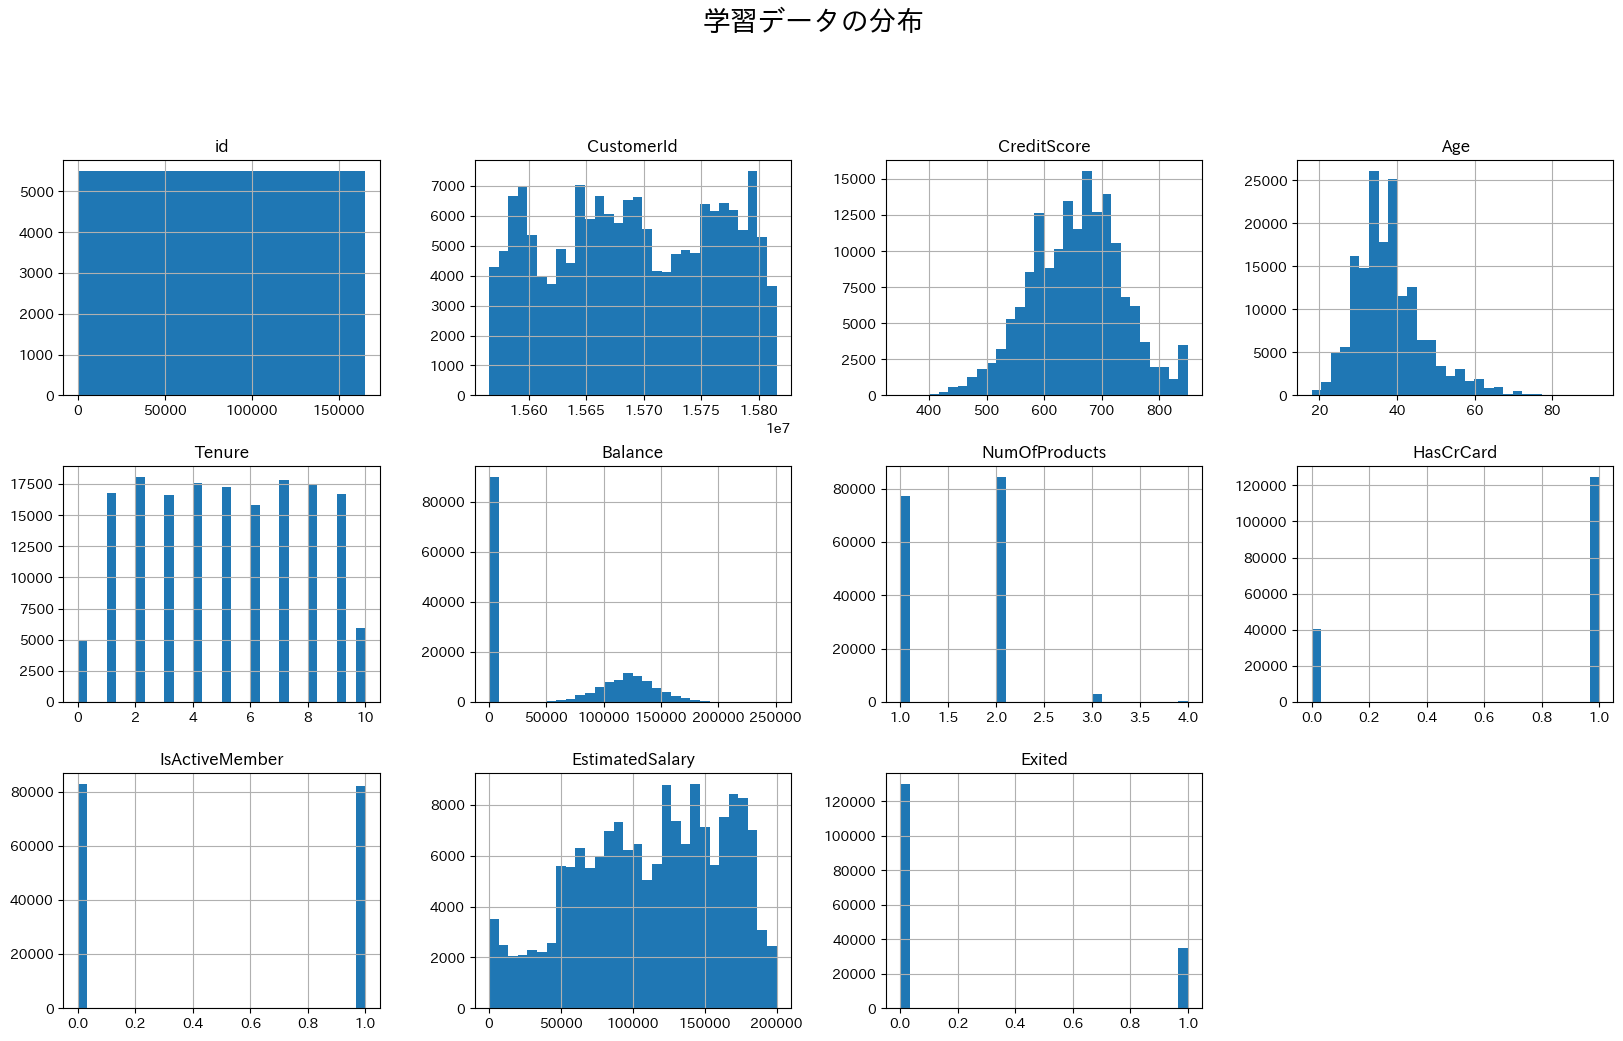

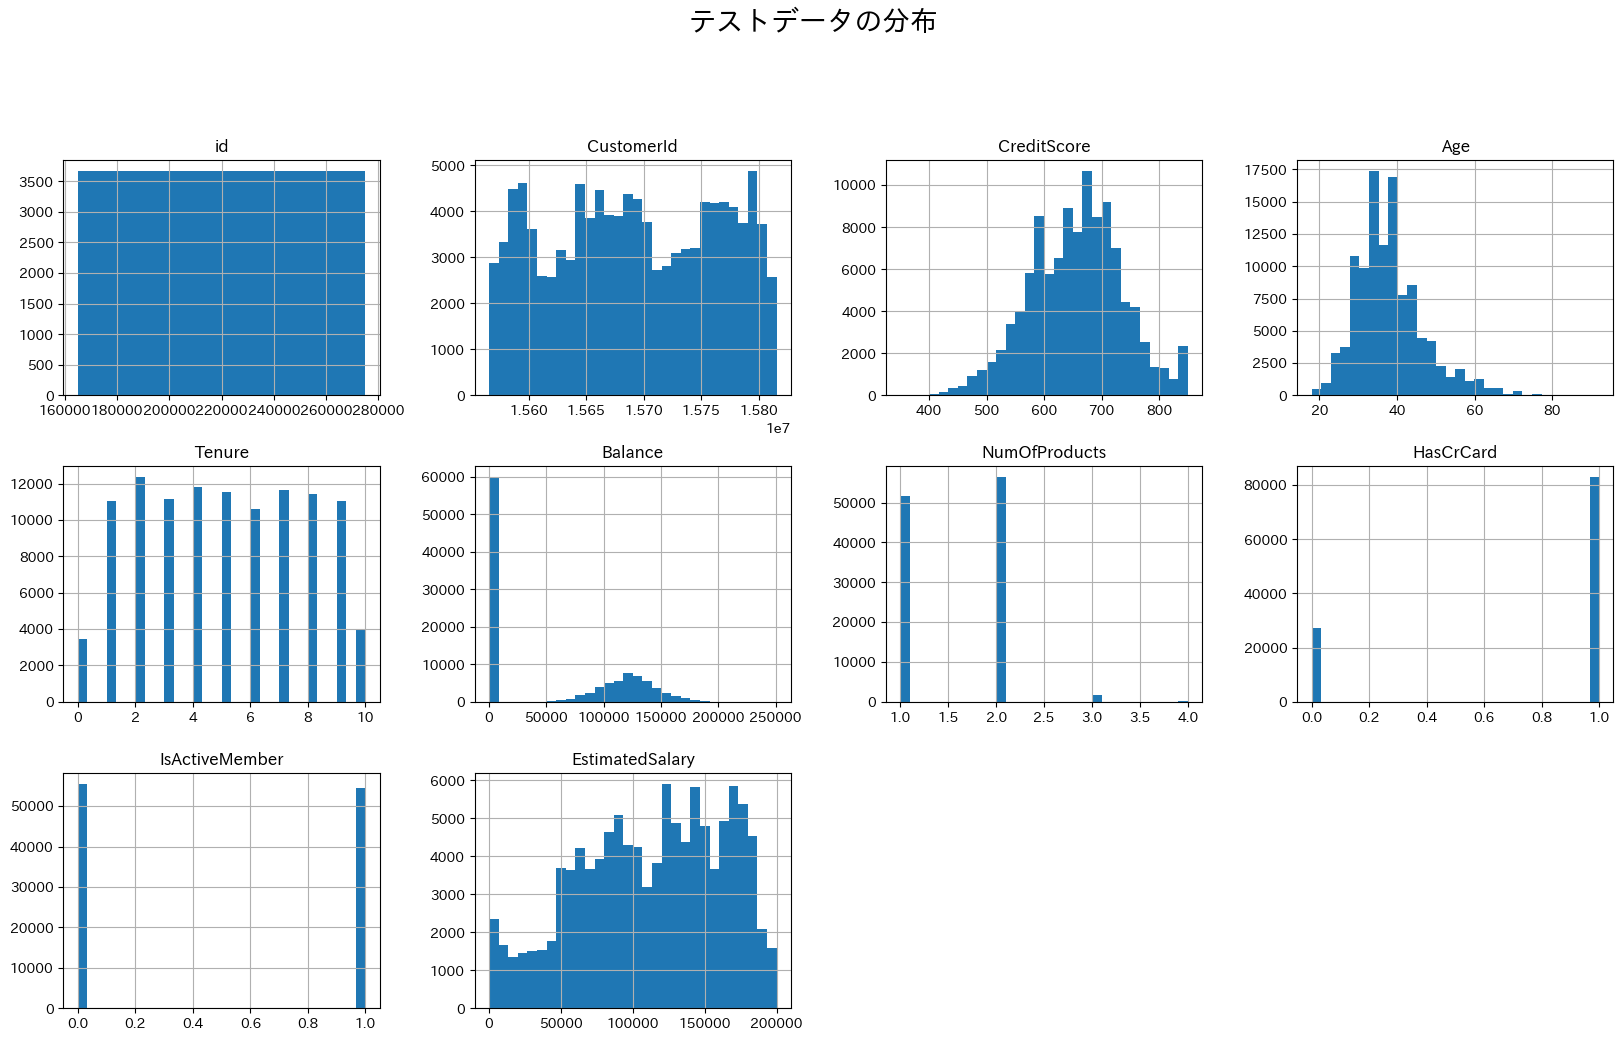

In [17]:
# 学習データの分布を確認
my_plot.plot_distributions(train_df, title="学習データの分布")

# テストデータの分布を確認
my_plot.plot_distributions(test_df, title="テストデータの分布")
